In [13]:
import pandas as pd
import matplotlib as md
import seaborn as sb
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [5]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive',force_remount=True)
path='/content/drive/My Drive/Colab Notebooks/Bengaluru_House_Data.csv'

Mounted at /content/drive


In [14]:
df=pd.read_csv(path)
df.head()
print(df.tail())
row,col=df.shape
print(df.shape)
print(df.info())
print("loc")
print(df['price'].dtype)
print(df.isnull().sum())
df.dropna(subset=['society'], inplace=True)
print(df.isnull().sum())
df['bath'].fillna(df['bath'].mean(), inplace=True)
df['balcony'].fillna(df['balcony'].mean(), inplace=True)
df['size'].fillna(df['size'].mode()[0], inplace=True)
df['location'].fillna(df['location'].mode()[0], inplace=True)
print(df.isnull().sum())
def convert_total_sqft(x):
    if(x.count('-')!=0):
        a, b = x.split('-')
        return (float(a) + float(b)) / 2
    return x

df['total_sqft'] = df['total_sqft'].apply(convert_total_sqft)
print(df['total_sqft'])
df.dropna(subset=['total_sqft'],inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.head())

                  area_type   availability               location       size  \
13315        Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13316  Super built-up  Area  Ready To Move          Richards Town      4 BHK   
13317        Built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   
13318  Super built-up  Area         18-Jun        Padmanabhanagar      4 BHK   
13319  Super built-up  Area  Ready To Move           Doddathoguru      1 BHK   

       society total_sqft  bath  balcony  price  
13315  ArsiaEx       3453   4.0      0.0  231.0  
13316      NaN       3600   5.0      NaN  400.0  
13317  Mahla T       1141   2.0      1.0   60.0  
13318  SollyCl       4689   4.0      1.0  488.0  
13319      NaN        550   1.0      1.0   17.0  
(13320, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type

In [7]:

import re

# 1) Clean total_sqft (convert to numeric)
def convert_sqft(x):
    x = str(x)

    # Case 1: if numeric, return directly
    if re.match(r'^\d+(\.\d+)?$', x):
        return float(x)

    # Case 2: if it's a range like "2100 - 2850"
    if '-' in x:
        a, b = x.split('-')
        try:
            return (float(a) + float(b)) / 2
        except:
            return np.nan

    # Case 3: extract first number (e.g., "34.46Sq. Meter")
    match = re.search(r'(\d+(\.\d+)?)', x)
    if match:
        return float(match.group(1))

    return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

# Convert numeric columns safely
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

# Drop rows where total_sqft or price is missing
df = df.dropna(subset=['total_sqft', 'price'])

# 1) How many unique locations?
print("1) Number of unique locations:", df['location'].nunique())

# 2) Average house price per location
avg_price = df.groupby('location')['price'].mean().sort_values(ascending=False)
print("\n2) Average price per location (Top 10):")
print(avg_price.head(10))

# 3) Location with highest average price
top_loc = avg_price.idxmax()
top_price = avg_price.max()
print(f"\n3) Highest average price location: {top_loc} — {top_price:.2f} lakhs")

# 4) Correlation between sqft, bath, price
corr = df[['total_sqft', 'bath', 'price']].corr()
print("\n4) Correlation:\n", corr)

# 5) Interpretation (simple logic)
corr_sqft_price = corr.loc['total_sqft', 'price']
print("\n5) Interpretation:")

if corr_sqft_price > 0.7:
    print("• Strong positive correlation → Larger houses generally have higher prices.")
elif corr_sqft_price > 0.4:
    print("• Moderate correlation → Larger houses often cost more, but not always.")
else:
    print("• Weak correlation → Size alone does NOT determine price.")

1) Number of unique locations: 648

2) Average price per location (Top 10):
location
Yemlur               1605.833333
D Souza Layout       1015.000000
Sindhi Colony         988.000000
Shanthala Nagar       827.500000
Hunasamaranahalli     787.500000
Vasanth nagar         721.500000
Cunningham Road       684.142857
Langford Gardens      649.500000
St. John's Road       630.000000
Sathya Sai Layout     609.250000
Name: price, dtype: float64

3) Highest average price location: Yemlur — 1605.83 lakhs

4) Correlation:
             total_sqft      bath     price
total_sqft    1.000000  0.616575  0.698277
bath          0.616575  1.000000  0.585407
price         0.698277  0.585407  1.000000

5) Interpretation:
• Moderate correlation → Larger houses often cost more, but not always.


Task 4 — Data Visualization
Use the specific visualization types mentioned for each question.
Price Distribution:
Plot the distribution of the price column using a Histogram + KDE curve.
Relationship Between Area and Price:
Visualize the relationship between total_sqft and price using a Scatter Plot.
Effect of Bathrooms on Price:
Show how bath count affects house prices using a Box Plot.
Top 10 Most Expensive Locations:
Plot the Top 10 locations with highest average price using a Bar Chart.
Correlation Between Numeric Columns:
Create a Heatmap to visualize correlations among numeric features (price, total_sqft, bath, balcony, etc.).

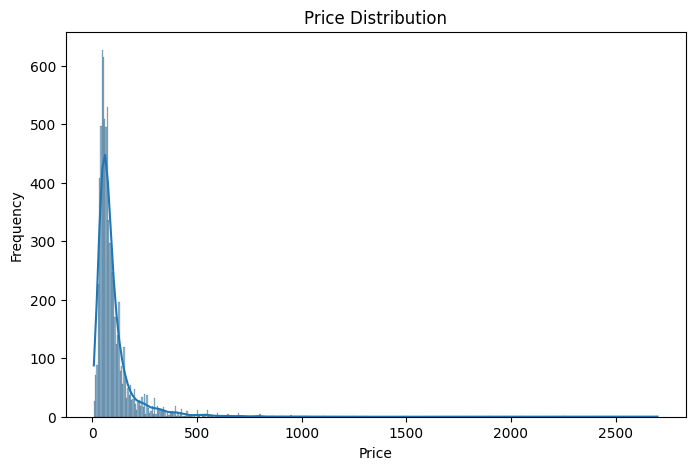

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


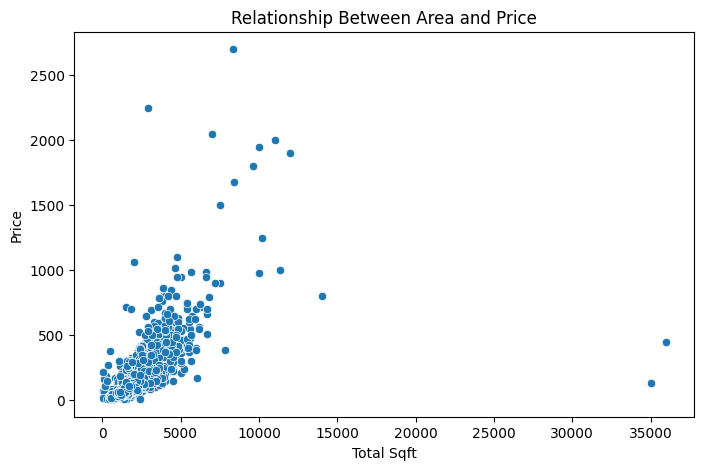

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['total_sqft'], y=df['price'])
plt.title("Relationship Between Area and Price")
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.show()


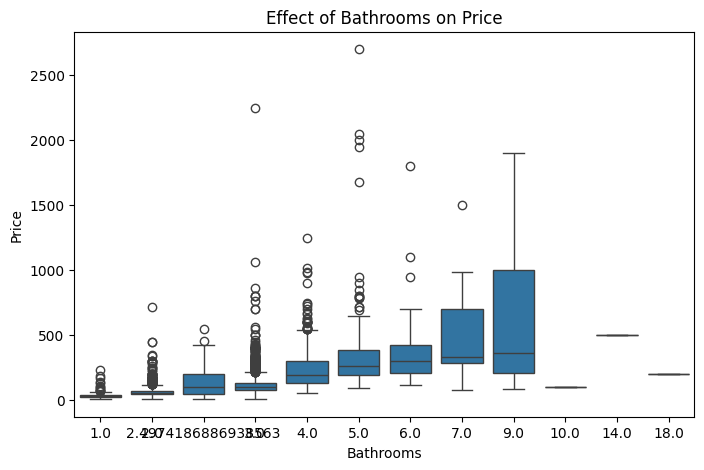

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['bath'], y=df['price'])
plt.title("Effect of Bathrooms on Price")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()


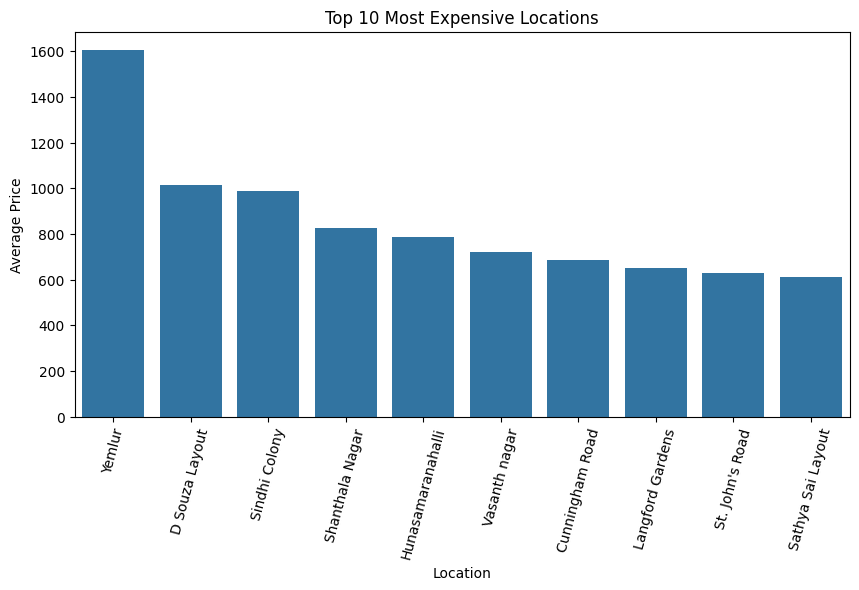

In [11]:
top10 = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.title("Top 10 Most Expensive Locations")
plt.xlabel("Location")
plt.ylabel("Average Price")
plt.xticks(rotation=75)
plt.show()


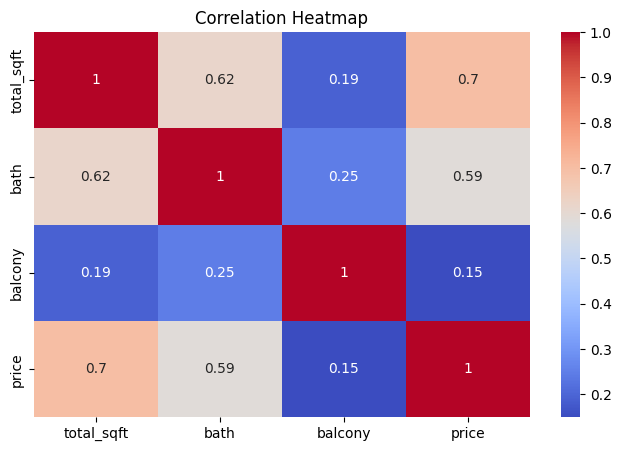

In [12]:
plt.figure(figsize=(8,5))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
